<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/MID_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Phoenix - 2201735413

Machine Learning - LA01

In [ ]:
# https://drive.google.com/file/d/1nl-4PGyGo1EctzURUI0pbTI8Y45D1q-i/view?usp=sharing
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nl-4PGyGo1EctzURUI0pbTI8Y45D1q-i' -O dataset.csv

--2020-06-23 16:08:12--  https://docs.google.com/uc?export=download&id=1nl-4PGyGo1EctzURUI0pbTI8Y45D1q-i
Resolving docs.google.com (docs.google.com)... 74.125.204.113, 74.125.204.138, 74.125.204.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kg8d0j6ds0k8p58gt2ts2u9a8ud9gf7o/1592928450000/13698787521697155934/*/1nl-4PGyGo1EctzURUI0pbTI8Y45D1q-i?e=download [following]
--2020-06-23 16:08:12--  https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kg8d0j6ds0k8p58gt2ts2u9a8ud9gf7o/1592928450000/13698787521697155934/*/1nl-4PGyGo1EctzURUI0pbTI8Y45D1q-i?e=download
Resolving doc-14-7k-docs.googleusercontent.com (doc-14-7k-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-14-7k-docs.googleusercontent.com (doc-14-7k-d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('dataset.csv')
# Dikarenakan data memiliki kolom kosong dari kolom 31 - 90 maka kita hanya perlu menggunakan 30 kolom pertama
datafull = dataset[dataset.columns[range(30)]]
print(datafull)
print(datafull.dtypes)
print(datafull.isna().values.any())
 
# Pilih 12 Feature secara random
data = datafull[datafull.columns[[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 28]]]
print(data)
print(data.dtypes)
print(data.isna().values.any())

             id    host_id  ... review_scores_rating reviews_per_month
0         35303     151977  ...                   94              0.18
1        197677     964081  ...                   95              1.57
2        289597     341577  ...                   95              1.18
3        370759    1573631  ...                   95              1.39
4        700253     341577  ...                   96              1.12
...         ...        ...  ...                  ...               ...
13044  43260549  191971770  ...                  NaN               NaN
13045  43260684  191971770  ...                  NaN               NaN
13046  43272924  335257890  ...                  NaN               NaN
13047  43281694  333948576  ...                  NaN               NaN
13048  43286916  341561924  ...                  NaN               NaN

[13049 rows x 30 columns]
id                            int64
host_id                      object
host_name                    object
host_response

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Pre-processing

Jika di cek menggunakan value_counts(), data memiliki banyak value yang tidak sesuai dan beberapa value memiliki count sangat sedikit maka value tersebut akan diubah menjadi NULL .

Untuk mengecek dapat dijalankan kode dibawah ini:

In [ ]:
# print("property_type -----------------------------------------------------")
# print(data["property_type"].value_counts())
# print("room_type ---------------------------------------------------------")
# print(data["room_type"].value_counts())
# print("accommodates ------------------------------------------------------")
# print(data["accommodates"].value_counts())
# print("bathrooms ---------------------------------------------------------")
# print(data["bathrooms"].value_counts())
# print("bedrooms ----------------------------------------------------------")
# print(data["bedrooms"].value_counts())
# print("beds --------------------------------------------------------------")
# print(data["beds"].value_counts())
# print("price -------------------------------------------------------------")
# print(data["price"].value_counts())
# print("guests_included ---------------------------------------------------")
# print(data["guests_included"].value_counts())
# print("extra_people ------------------------------------------------------")
# print(data["extra_people"].value_counts())
# print("minimum_nights ----------------------------------------------------")
# print(data["minimum_nights"].value_counts())
# print("maximum_nights ----------------------------------------------------")
# print(data["maximum_nights"].value_counts())
# print("review_scores_rating ----------------------------------------------")
# print(data["review_scores_rating"].value_counts())

Berikut kode untuk mengubah value yang memiliki jumlah sedikit menjadi NULL

In [ ]:
threshold = 10
value_counts = data.stack().value_counts()
to_remove = value_counts[value_counts <= threshold].index
data.replace(to_remove, np.nan, inplace=True)

Data yang memiliki nilai NULL akan dihapus. Data NULL tersebut dapat berasal dari dataset awal maupun setelah proses filtering yang dilakukan

In [ ]:
data = data.dropna()
print(data)
print(data.dtypes)
print(data.isna().values.any())

      property_type        room_type  ... maximum_nights review_scores_rating
0         Apartment     Private room  ...           1125                   94
1         Apartment  Entire home/apt  ...            365                   95
2         Apartment  Entire home/apt  ...            180                   95
4         Apartment  Entire home/apt  ...            180                   96
6         Apartment  Entire home/apt  ...            365                   90
...             ...              ...  ...            ...                  ...
12889     Apartment  Entire home/apt  ...           1125                  100
12916     Apartment  Entire home/apt  ...           1125                  100
12932     Apartment  Entire home/apt  ...           1125                  100
12991     Apartment  Entire home/apt  ...           1125                  100
13001     Apartment  Entire home/apt  ...             90                  100

[9266 rows x 12 columns]
property_type           object
room_ty

Setelah data dicek kembali maka value setiap kolom telah menjadi lebih rapih dan sesuai.

Untuk mengecek dapat dijalankan kode dibawah ini:

In [ ]:
# print("property_type -----------------------------------------------------")
# print(data["property_type"].value_counts())
# print("room_type ---------------------------------------------------------")
# print(data["room_type"].value_counts())
# print("accommodates ------------------------------------------------------")
# print(data["accommodates"].value_counts())
# print("bathrooms ---------------------------------------------------------")
# print(data["bathrooms"].value_counts())
# print("bedrooms ----------------------------------------------------------")
# print(data["bedrooms"].value_counts())
# print("beds --------------------------------------------------------------")
# print(data["beds"].value_counts())
# print("price -------------------------------------------------------------")
# print(data["price"].value_counts())
# print("guests_included ---------------------------------------------------")
# print(data["guests_included"].value_counts())
# print("extra_people ------------------------------------------------------")
# print(data["extra_people"].value_counts())
# print("minimum_nights ----------------------------------------------------")
# print(data["minimum_nights"].value_counts())
# print("maximum_nights ----------------------------------------------------")
# print(data["maximum_nights"].value_counts())
# print("review_scores_rating ----------------------------------------------")
# print(data["review_scores_rating"].value_counts())

Sebelum masuk ke tahap Feature Selection, ada beberapa yang hal yang perlu dilakukan:
1.   Data yang berupa string perlu diubah menjadi numeric dengan cara diberi label
2.   Menghilangkan simbol '$' dan ',' pada kolom yang berisi harga agar dapat dibuat menjadi numeric
3.   Mengubah seluruh tipe data menjadi float





In [ ]:
# Proses mengubah data bertipe string menjadi numeric dengan LabelEnncoder
pre = preprocessing.LabelEncoder()
pre.fit(data.property_type)
data['property_type'] = pre.transform(data.property_type)

pre2 = preprocessing.LabelEncoder()
pre2.fit(data.room_type)
data['room_type'] = pre2.transform(data.room_type)

# preprocessing menggunakan variable yang berbeda (pre dan pre2) agar data dapat dikembalikan jika diperlukan menggunakan fungsi berikut:
# pre.inverse_transform(data['property_type'])
# pre2.inverse_transform(data['room_type'])

# Simbol '$' pada kolom price serta extra people perlu dihilangkan dan diubah menjadi float
data['price'] = data.price.str.replace('$', '')
data['price'] = data.price.str.replace(',', '')

data['extra_people'] = data.extra_people.str.replace('$', '')
data['extra_people'] = data.extra_people.str.replace(',', '')

# Tipe seluruh data diubah menjadi float
data = data.astype(float)


In [ ]:
print(data)
print(data.dtypes)
# print("property_type -----------------------------------------------------")
# print(data["property_type"].value_counts())
# print("room_type ---------------------------------------------------------")
# print(data["room_type"].value_counts())
# print("price -------------------------------------------------------------")
# print(data["price"].value_counts())
# print("extra_people ------------------------------------------------------")
# print(data["extra_people"].value_counts())

       property_type  room_type  ...  maximum_nights  review_scores_rating
0                1.0        2.0  ...          1125.0                  94.0
1                1.0        0.0  ...           365.0                  95.0
2                1.0        0.0  ...           180.0                  95.0
4                1.0        0.0  ...           180.0                  96.0
6                1.0        0.0  ...           365.0                  90.0
...              ...        ...  ...             ...                   ...
12889            1.0        0.0  ...          1125.0                 100.0
12916            1.0        0.0  ...          1125.0                 100.0
12932            1.0        0.0  ...          1125.0                 100.0
12991            1.0        0.0  ...          1125.0                 100.0
13001            1.0        0.0  ...            90.0                 100.0

[9266 rows x 12 columns]
property_type           float64
room_type               float64
accommodat

#Feature Selection
Hasil yang terlihat pada tahap feature selection tidaklah begitu baik, dimana nilai yang didapatkan sangat kecil (mendekati 0) hal ini menandakan bahwa keterkaitan antar data kurang baik.

Namun berdasarkan hasil yang didapatkan maka feature yang dipilih adalah


*   ["accommodates", "beds", "price", "guests_included", "extra_people", "minimum_nights", "maximum_nights"] untuk kolom "review_scores_rating"
*   ["accommodates", "beds", "extra_people", "minimum_nights", "maximum_nights", "review_scores_rating"] untuk kolom "price"



Feature Importance terhadap kolom "price" menggunakan algoritma Extra Trees classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


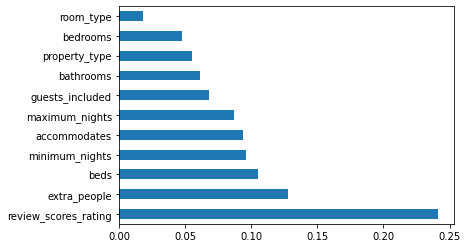

In [ ]:
X = data.iloc[:,[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]]
y = data.iloc[:,[6]]
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Feature Importance terhadap kolom "review_scores_rating" menggunakan algoritma Extra Trees classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


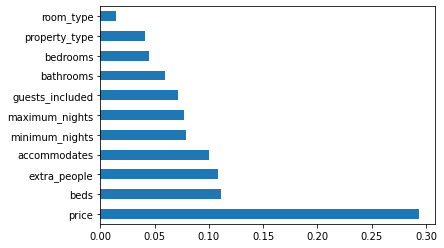

In [ ]:
X = data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = data.iloc[:,[11]]
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Correlation Matrix Heatmap

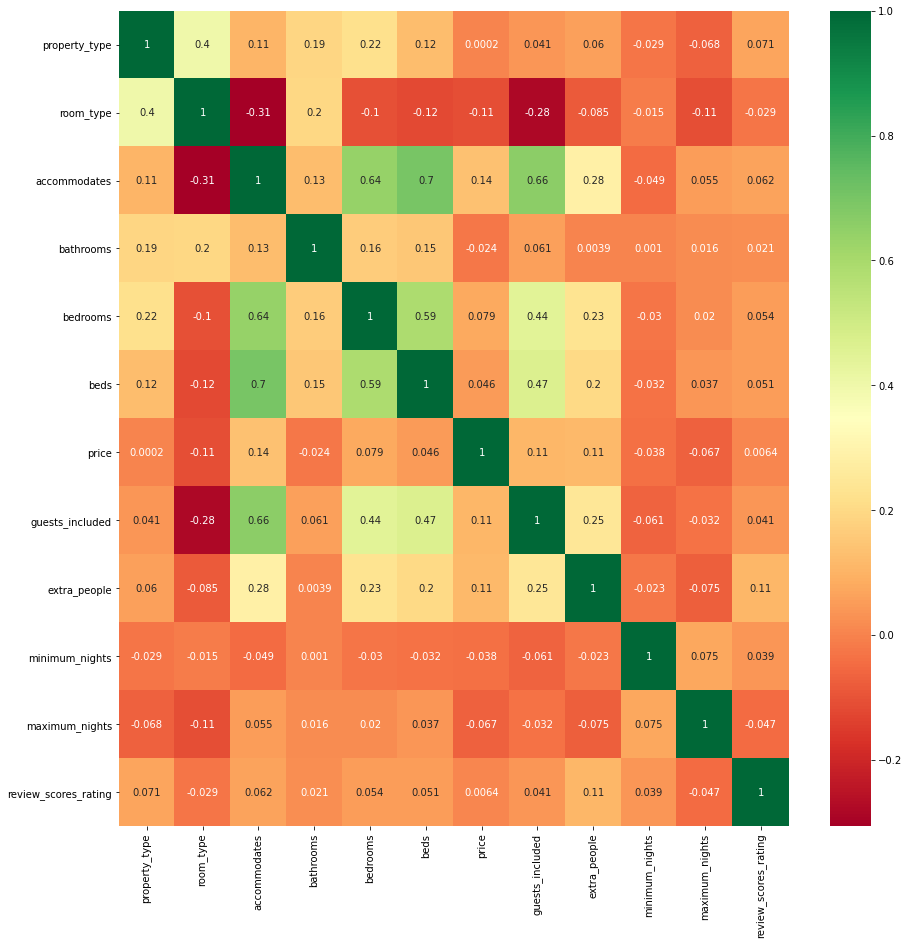

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

#Split Train and Test Dataset

Berdasarkan feature selection diatas,  maka berikut feature yang digunakan

In [ ]:
# Split dengan target "review_scores_rating"
# Selected Feature
X = data[["accommodates", "beds", "price", "guests_included", "extra_people", "minimum_nights", "maximum_nights"]]
Y = data["review_scores_rating"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

# All Feature
X1 = data[["property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "price"]]
Y1 = data["review_scores_rating"]
XTrain1, XTest1, YTrain1, YTest1 = train_test_split(X1, Y1, test_size=0.2)

# Split dengan target "price"
# Selected Feature
Xprice = data[["accommodates", "beds", "extra_people", "minimum_nights", "maximum_nights", "review_scores_rating"]]
Yprice = data["price"]
XTrainprice, XTestprice, YTrainprice, YTestprice = train_test_split(Xprice, Yprice, test_size=0.2)

# All Feature
Xprice1 = data[["property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "review_scores_rating"]]
Yprice1 = data["price"]
XTrainprice1, XTestprice1, YTrainprice1, YTestprice1 = train_test_split(Xprice1, Yprice1, test_size=0.2)

#Linear Regression

In [ ]:
reg = LinearRegression()  
reg.fit(XTrainprice, YTrainprice)
y_pred = reg.predict(XTestprice)

df = pd.DataFrame({'Actual': YTestprice, 'Predicted': y_pred})
print(df.head(25))

        Actual     Predicted
7634   11048.0  22149.665313
500    13798.0  40187.632181
9611    6007.0  11616.410174
8138    2460.0  13030.512321
9138    9975.0  13824.869646
5032    7487.0  14751.631680
1809    5041.0   6155.302344
8130    3540.0  19024.556634
4178   34967.0  59340.280452
5290    6007.0  28953.552513
9569    9761.0   3702.362480
10514   9761.0  12907.755997
2213    9947.0  15143.160783
3871   30033.0  57177.866837
3927    9546.0  31778.181297
7132   18020.0  27165.678411
11058   8045.0  16001.566366
1639    2467.0  46384.690625
5454    9975.0  28695.195868
11592   6007.0  16880.992337
1686    8045.0   7987.974738
9516    3325.0  20469.459945
9638    3530.0  13331.772618
1207   19951.0  40326.511201
7947    9947.0  24184.790969


In [ ]:
print('Mean Absolute Error     :', metrics.mean_absolute_error(YTestprice, y_pred))  
print('Mean Squared Error      :', metrics.mean_squared_error(YTestprice, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(YTestprice, y_pred)))

Mean Absolute Error     : 22359.432485484216
Mean Squared Error      : 4960141396.941823
Root Mean Squared Error : 70428.27129031226


Secara teori, feature engineering serta feature selection dapat memperbaik hasil yang didapatkan.

Dalam kasus ini, feature engineering berperan besar dalam preprocessing data karena data awal memiliki nilai yang tidak sesuai. Namun untuk feature selection kurang terlihat pengaruhnya, karena didapatkan hasil error yang serupa. Dapat dilihat dibawah ini:

In [ ]:
reg = LinearRegression()  
reg.fit(XTrainprice1, YTrainprice1)
y_pred = reg.predict(XTestprice1)

print('Mean Absolute Error     :', metrics.mean_absolute_error(YTestprice1, y_pred))  
print('Mean Squared Error      :', metrics.mean_squared_error(YTestprice1, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(YTestprice1, y_pred)))

Mean Absolute Error     : 24182.796186475884
Mean Squared Error      : 6636527256.579342
Root Mean Squared Error : 81464.88357924132


#Nearest-Neighbor Classification

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(XTrain, YTrain)
Ypred  = clf.predict(XTest)

print("Accuracy: ", metrics.accuracy_score(YTest, Ypred))

Accuracy:  0.08198489751887811


Hasil tersebut didapatkan jika menggunakan K = 3, sedangkan hasil terbaik didapatkan menggunakan K = 22, dapat dilihat pada kode dibawah ini:

In [ ]:
MaxK = 30
acc = np.zeros((MaxK-1))

for n in range(1, MaxK):    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(XTrain, YTrain)
    Ypred  = clf.predict(XTest)
    acc[n - 1] = metrics.accuracy_score(YTest, Ypred)

print("Best Accuracy : %f" % acc.max(), ", with k = ", acc.argmax() + 1)

Best Accuracy : 0.126214 , with k =  22


Secara teori, feature engineering serta feature selection dapat memperbaik hasil yang didapatkan.

Dalam kasus ini, feature engineering berperan besar dalam preprocessing data karena data awal memiliki nilai yang tidak sesuai. Namun untuk feature selection kurang terlihat pengaruhnya, karena didapatkan hasil accuracy yang serupa. Dapat dilihat dibawah ini:

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy:  0.09061488673139159


In [ ]:
MaxK = 30
acc = np.zeros((MaxK-1))

for n in range(1, MaxK):    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(XTrain, YTrain)
    Ypred  = clf.predict(XTest)
    acc[n - 1] = metrics.accuracy_score(YTest, Ypred)

print("Best Accuracy : %f" % acc.max(), ", with k = ", acc.argmax() + 1)

Best Accuracy : 0.126214 , with k =  22


#Support-Vector Machine Classification

In [ ]:
clf = SVC()
clf.fit(XTrain, YTrain)
Ypred  = clf.predict(XTest)

print("Accuracy: ", metrics.accuracy_score(YTest, Ypred))

Accuracy:  0.16936353829557713


Secara teori, feature engineering serta feature selection dapat memperbaik hasil yang didapatkan.

Dalam kasus ini, feature engineering berperan besar dalam preprocessing data karena data awal memiliki nilai yang tidak sesuai. Namun untuk feature selection kurang terlihat pengaruhnya, karena didapatkan hasil accuracy yang serupa. Dapat dilihat dibawah ini:

In [ ]:
clf = SVC()
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy:  0.1796116504854369


#Classification Tree

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(XTrain, YTrain)
Ypred  = clf.predict(XTest)

print("Accuracy: ", metrics.accuracy_score(YTest, Ypred))

Accuracy:  0.12459546925566344


Secara teori, feature engineering serta feature selection dapat memperbaik hasil yang didapatkan.

Dalam kasus ini, feature engineering berperan besar dalam preprocessing data karena data awal memiliki nilai yang tidak sesuai. Namun untuk feature selection kurang terlihat pengaruhnya, karena didapatkan hasil accuracy yang serupa. Dapat dilihat dibawah ini:

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy:  0.12405609492988134


# Conclusion


*   Metric yang digunakan untuk menghitung accuracy berasal dari library  sklearn metrics kemudian memanggil fungsi metrics.accuracy_score.
*   Jika dibandingkan dari ketiga metode classification, SVM mendapatkan hasil yang terbaik dengan accuracy 17.96% diikuti dengan KNN 12.62% dan Decision Tree dengan accuracy 12.45%.
*   Ketiga accuracy yang didapatkan sangatlah kecil, hal ini dapat disebabkan karena banyaknya class output ditambah lagi ada beberapa class yang memiliki input sedikit, oleh karena itu akan dilakukan upsampling pada setiap kelas.


#Resampling
Resampling dapat membuat hasil lebih baik serta membuat data menjadi lebih balance, dapat dilihat sebelumnya bahwa terdapat beberapa kelas yang mempunyai inputan sangat sedikit, oleh karena itu dilakukan upsampling agar seluruh kelas memiliki jumlah data yang sama. Namun resampling dapat menyebabkan adanya data train dan test dengan nilai yang sama.

In [ ]:
resamp = data
majority = resamp[resamp["review_scores_rating"]==100]
new = majority

for i in range(100) :
  if i in resamp["review_scores_rating"].values:
    minority = resamp[resamp["review_scores_rating"]==i]
    minority_upsampled = resample(minority,replace=True, n_samples=len(majority), random_state=27)
    new = pd.concat([new, minority_upsampled])
    
print(new["review_scores_rating"].value_counts())

78.0     1539
74.0     1539
100.0    1539
81.0     1539
88.0     1539
67.0     1539
95.0     1539
73.0     1539
40.0     1539
87.0     1539
85.0     1539
94.0     1539
72.0     1539
65.0     1539
79.0     1539
86.0     1539
93.0     1539
50.0     1539
96.0     1539
80.0     1539
89.0     1539
82.0     1539
92.0     1539
99.0     1539
30.0     1539
71.0     1539
84.0     1539
91.0     1539
98.0     1539
60.0     1539
70.0     1539
76.0     1539
83.0     1539
90.0     1539
97.0     1539
77.0     1539
75.0     1539
20.0     1539
Name: review_scores_rating, dtype: int64


##Feature Selection Resampled
Hasil yang didapatkan pada feature selection sebelum dan sesudah dilakukan resampling tidak berbeda jauh, maka feature yang dipilih untuk dilakukan train-test tidak berubah.

Feature Importance terhadap kolom "price" menggunakan algoritma Extra Trees classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


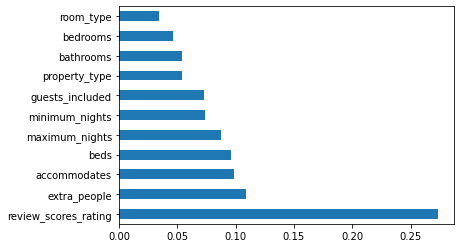

In [ ]:
X = new.iloc[:,[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]]
y = new.iloc[:,[6]]
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Feature Importance terhadap kolom "review_scores_rating" menggunakan algoritma Extra Trees classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


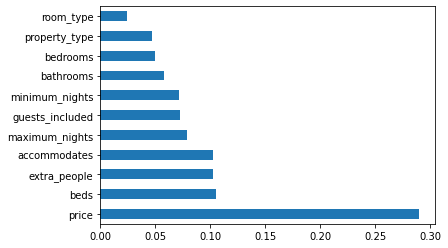

In [ ]:
X = new.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = new.iloc[:,[11]]
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Correlation Matrix Heatmap

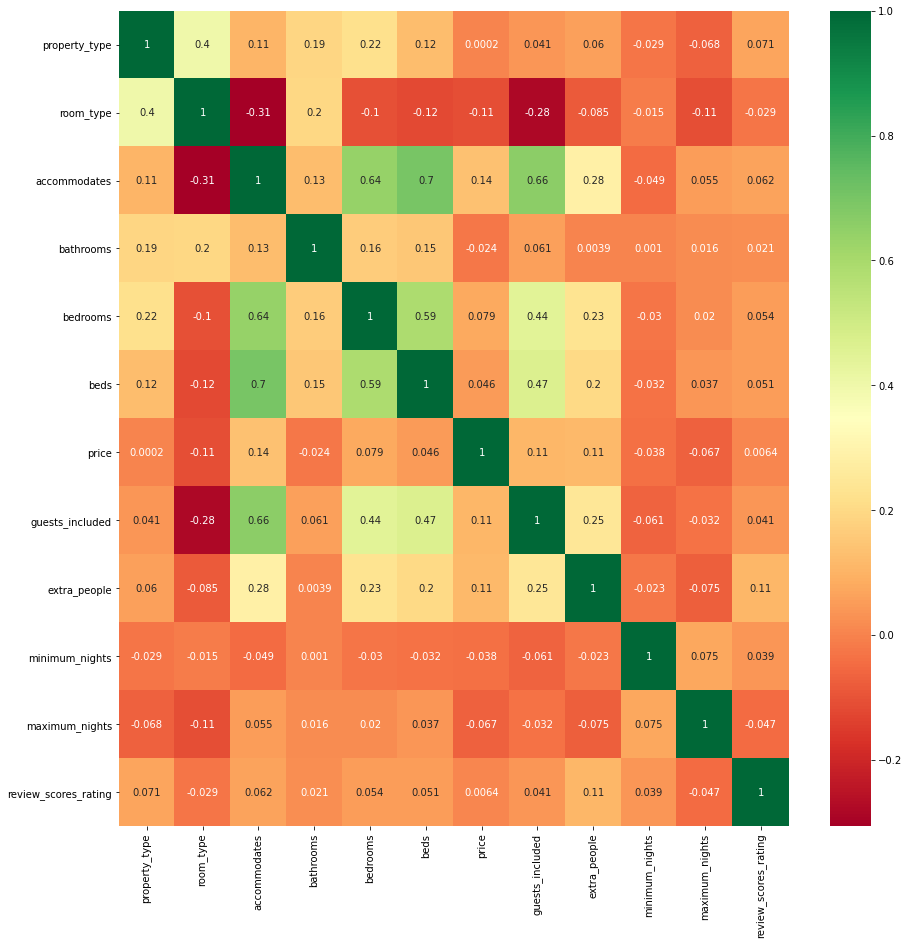

In [ ]:
corrmat = new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

##Split Train and Test Resampled Dataset

In [ ]:
# Split dengan target "review_scores_rating"
# Selected Feature
X1 = new[["accommodates", "beds", "price", "guests_included", "extra_people", "minimum_nights", "maximum_nights"]]
Y1 = new["review_scores_rating"]
XTrain1, XTest1, YTrain1, YTest1 = train_test_split(X1, Y1, test_size=0.2)

# All Feature
X2 = new[["property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "price"]]
Y2 = new["review_scores_rating"]
XTrain2, XTest2, YTrain2, YTest2 = train_test_split(X2, Y2, test_size=0.2)

# Split dengan target "price"
# Selected Feature
Xprice1 = new[["accommodates", "beds", "extra_people", "minimum_nights", "maximum_nights", "review_scores_rating"]]
Yprice1 = new["price"]
XTrainprice1, XTestprice1, YTrainprice1, YTestprice1 = train_test_split(Xprice1, Yprice1, test_size=0.2)

# All Feature
Xprice2 = new[["accommodates", "beds", "extra_people", "minimum_nights", "maximum_nights", "review_scores_rating"]]
Yprice2 = new["price"]
XTrainprice2, XTestprice2, YTrainprice2, YTestprice2 = train_test_split(Xprice2, Yprice2, test_size=0.2)

##Linear Regression Resample

Linear Regression Resampled dengan feature yang telah dipilih

In [ ]:
reg = LinearRegression()  
reg.fit(XTrainprice1, YTrainprice1)
y_pred = reg.predict(XTestprice1)

print('Mean Absolute Error     :', metrics.mean_absolute_error(YTestprice1, y_pred))  
print('Mean Squared Error      :', metrics.mean_squared_error(YTestprice1, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(YTestprice1, y_pred)))

Mean Absolute Error     : 19543.778560197767
Mean Squared Error      : 4526425588.627297
Root Mean Squared Error : 67278.71571773125


Linear Regression Resampled dengan seluruh feature

In [ ]:
reg = LinearRegression()  
reg.fit(XTrainprice2, YTrainprice2)
y_pred = reg.predict(XTestprice2)

print('Mean Absolute Error     :', metrics.mean_absolute_error(YTestprice2, y_pred))  
print('Mean Squared Error      :', metrics.mean_squared_error(YTestprice2, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(YTestprice2, y_pred)))

Mean Absolute Error     : 19407.308381764935
Mean Squared Error      : 4414531171.7429085
Root Mean Squared Error : 66441.93835028376


Hasil Linear Regression setelah dilakukan resampling menjadi lebih baik, namun feature selection yang dilakukan kurang terlihat keuntungannya

##Nearest-Neighbor Classification Resampled

KNN Resampled dengan feature yang telah dipilih

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy:  0.7122339061297769


Hasil tersebut didapatkan jika menggunakan K = 3, sedangkan hasil terbaik didapatkan menggunakan K = 2, dapat dilihat pada kode dibawah ini:

In [ ]:
MaxK = 30
acc = np.zeros((MaxK-1))

for n in range(1, MaxK):    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(XTrain1, YTrain1)
    Ypred  = clf.predict(XTest1)
    acc[n - 1] = metrics.accuracy_score(YTest1, Ypred)

print("Best Accuracy : %f" % acc.max(), ", with k = ", acc.argmax() + 1)

Best Accuracy : 0.727195 , with k =  2


KNN Resampled dengan seluruh feature

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(XTrain2, YTrain2)
Ypred  = clf.predict(XTest2)

print("Accuracy: ", metrics.accuracy_score(YTest2, Ypred))

Accuracy:  0.7290758314097632


In [ ]:
MaxK = 30
acc = np.zeros((MaxK-1))

for n in range(1, MaxK):    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(XTrain2, YTrain2)
    Ypred  = clf.predict(XTest2)
    acc[n - 1] = metrics.accuracy_score(YTest2, Ypred)

print("Best Accuracy : %f" % acc.max(), ", with k = ", acc.argmax() + 1)

Best Accuracy : 0.751475 , with k =  2


Hasil KNN setelah dilakukan resampling menjadi jauh lebih baik dimana accuracy yang hanya 12% berubah menjadi 75%. Namun, feature selection yang dilakukan sekali lagi kurang terlihat keuntungannya. Hal ini dapat dikarenakan setiap data memiliki keterkaitan yang kurang signifikan, dapat dilihat juga pada bagian feature selection dimana skor yang didapatkan sangatkan kecil semua (mendekati 0).

##Support-Vector Machine Resampled

SVM Resampled dengan feature yang telah dipilih

In [ ]:
clf = SVC()
clf.fit(XTrain1, YTrain1)
Ypred1  = clf.predict(XTest1)

print("Accuracy defaut: ", metrics.accuracy_score(YTest1, Ypred1))

Accuracy defaut:  0.09147644695220997


Hasil SVM yang didapatkan sangatlah kecil bahkan berkurang dibandingkan dengan sebelum dilakukan resampling. Hal ini dapat dikarenakan SVM bekerja dengan cara membuat garis batas antar data sehingga kurang cocok untung data dengan persebaran yang kurang baik. Setelah dilakukan upsampling, data yang didapatkan menjadi semakin kompleks. Telah dicoba juga beberapa SVM dengan kernel yang berbeda namun hasil terbaik tetap dengan kernel default yaitu rbf.

In [ ]:
clf = SVC(kernel='sigmoid')
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy sigmoid: ", metrics.accuracy_score(YTest1, Ypred))

clf = SVC(kernel='poly')
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy poly: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy sigmoid:  0.06822262118491922
Accuracy poly:  0.0524065999829016


SVM Resampled dengan seluruh feature

In [ ]:
clf = SVC()
clf.fit(XTrain2, YTrain2)
Ypred  = clf.predict(XTest2)

print("Accuracy defaut: ", metrics.accuracy_score(YTest2, Ypred))

Accuracy defaut:  0.08856971873129862


Oleh karena hasil yang didapatkan, dapat disimpulkan bahwa SVM kurang cocok untuk dataset yang telah dilakukan resampling dalam kasus ini

##Classification Tree Resampled

Decision Tree Resampled dengan feature yang telah dipilih

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(XTrain1, YTrain1)
Ypred  = clf.predict(XTest1)

print("Accuracy: ", metrics.accuracy_score(YTest1, Ypred))

Accuracy:  0.7611353338462854


Decision Tree Resampled dengan seluruh feature

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(XTrain2, YTrain2)
Ypred  = clf.predict(XTest2)

print("Accuracy: ", metrics.accuracy_score(YTest2, Ypred))

Accuracy:  0.7949901684192529


Hasil KNN setelah dilakukan resampling menjadi jauh lebih baik dimana accuracy yang hanya 12% berubah menjadi 79%. Namun, feature selection yang dilakukan sekali lagi kurang terlihat keuntungannya. Hal ini dapat dikarenakan setiap data memiliki keterkaitan yang kurang signifikan, dapat dilihat juga pada bagian feature selection dimana skor yang didapatkan sangatkan kecil semua (mendekati 0).

#Conclusion

*   Hasil resampling yang didapatkan untuk metoda Linear Regression, KNN, dan Decision tree menjadi lebih baik, terutama pada KNN dan Decision Tree dimana accuracy bertambah dengan sangat banyak, menjadi lebih dari 70%.
*   Metode SVM mendapatkan hasil accuracy yang berkurang. Hal ini dapat dikarenakan SVM bekerja dengan cara membuat garis batas antar data sehingga kurang cocok untung data dengan persebaran yang kurang baik. Setelah dilakukan upsampling, data yang didapatkan menjadi semakin kompleks.
*   Feature selection kurang berperan baik dalam kasus ini, bahkan hasil yang didapatkan lebih baik jika menggunakan seluruh feature. Hal ini dapat dikarenakan data yang digunakan kurang baik, dapat dilihat pada bagian feature selection bahwa keterkaitan suatu data tidaklah terlalu besar.


#Gaussian Mixture Model

Cara kerja Gaussian Mixture Model adalah :


1.   Menempatkan *n* buah area gaussian dengan mean dan covariance random. Convariance matrix menentukan bentuk dari gaussian.
2.   Untuk setiap input, hitung kemungkinan input tersebut berada dalam gaussian tertentu.
3.   Untuk setiap input, hitung kemungkinan input berada dalam gaussian tertentu.
4.   Untuk setiap input, hitung weight input terdapat gaussian tertentu.
5.   Hitung dan update mean setiap input terhadap gaussian
6.   Hitung dan update covariance setiap input terhadap gaussian
7.   Ulangi langkah 2 hingga konstan


Y Predict :  [0 0 0 ... 0 0 0]


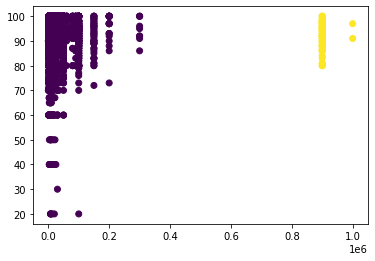

GMM:  0.9772382537748067


In [ ]:
GMM = GaussianMixture(n_components=2).fit(data)
YPredict = GMM.predict(data)
print("Y Predict : ", YPredict)

plt.scatter(data.iloc[:,6], data.iloc[:,11],c = YPredict)
plt.show()
print("GMM: ", silhouette_score(data, YPredict))

Berikut persebaran data diantara kolom ke 6 (price) dan kolom ke 11 (review_scores_rating) yang dibagi menjadi 2 komponen. Terdapat komponen berwarna ungu dan kuning yang terpisah secara cukup jelas. Kolom price dan review_scores_rating dipilih karena memiliki nilai feature importance satu sama lain yang cukup besar jika menggunakan algoritma extra trees classifier yang telah dilakukan pada bagian feature selection sebelumnya.

Nilai GMM didapatkan dari silhoutte_score dimana silhoutte score adalah sebuah ukuran keterkaitan antara setiap cluster dan cluster tetangganya. Nilai sikhoutte score berjarak diantara -1 hingga 1 dimana nilai yang tinggi (mendekati 1) berarti suatu object cocok terhadap cluster tersebut dan tidak cocok terhadap cluster lainnya, dan nilai yang rendah (nilai negatif) berarti kebalikannya. 

#K-Means Clustering

Cara kerja K-Means Clustering adalah :


1.   Menempatkan *n* buah titik yang dinamakan centroid secara random.
2.   Untuk setiap input, cari centroid terdekat dan tandai input tersebut menjadi cluster milik centroid tersebut.
3.   Update lokasi seluruh centroid dengan cara menghitung nilai tengah atau rata-rata dari seluruh lokasi input yang termasuk dalam centroid tersebut.
4.   Ulangi langkah 2 dan 3 hingga tidak terjadi adanya perubahan cluster. (Jika data masih belum stabil, pasti akan terjadi perubahan cluster serta perubahan lokasi centroid)


In [ ]:
# Training using KMean
KMN = KMeans(n_clusters=3).fit(data)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
YPredict = KMN.predict(data)
print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", YPredict)

KMN Labels :  [0 0 0 ... 0 0 0]
KMN Cluster Centre :  [[3.57251389e+00 5.72400499e-01 4.27452092e+00 1.27333031e+00
  1.26374872e+00 2.60029482e+00 1.44421834e+04 2.35162717e+00
  1.41200544e+03 3.42499150e+00 6.57045583e+02 9.27032543e+01]
 [4.50000000e+00 1.29032258e-01 6.41935484e+00 1.11290323e+00
  1.83870968e+00 2.66129032e+00 9.03256935e+05 3.22580645e+00
  3.16129032e+03 1.01612903e+00 3.53806452e+02 9.22741935e+01]
 [2.44155844e+00 1.29870130e-01 4.58181818e+00 1.11688312e+00
  1.20000000e+00 2.51948052e+00 1.14738834e+05 2.21298701e+00
  1.19142857e+03 1.58441558e+00 6.42909091e+02 9.23428571e+01]]
Y Predict :  [0 0 0 ... 0 0 0]


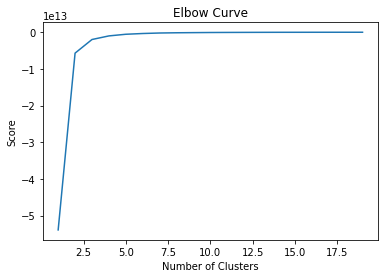

In [ ]:
# Choosing the right number of K with Elbow Curve
Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(data).score(data) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Dari kurva ini didapatkan bahwa nilai cluster terbaik ada pada n=3

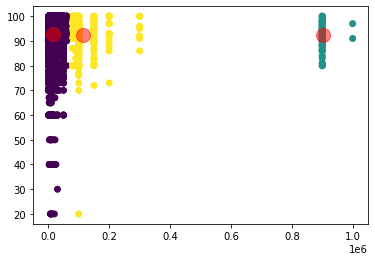

KMeans:  0.8559880417174838


In [ ]:
# Visualise KMeans
plt.scatter(data.iloc[:, 6], data.iloc[:, 11], c = YPredict)
plt.scatter(KMNClusterCenters[:, 6], KMNClusterCenters[:, 11], c = "r", s=200, alpha=0.5);

plt.show()
print("KMeans: ", silhouette_score(data, YPredict))

Berikut persebaran data diantara kolom ke 6 (price) dan kolom ke 11 (review_scores_rating) yang dibagi menjadi 3 komponen. Terdapat cluster yang ditandai dengan warna ungu, kuning dan hijau yang terpisah cukup jelas disertai dengan ikon bulat berwarna merah yang menandai nilai tengah setiap cluster.Kolom price dan review_scores_rating dipilih karena memiliki nilai feature importance satu sama lain yang cukup besar jika menggunakan algoritma extra trees classifier yang telah dilakukan pada bagian feature selection sebelumnya.

Nilai KMeans berasal dari silhoutte_score yang telah dijelaskan pada bagian GMM sebelumnya.